# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

In [1]:
import os
import pandas as pd
import numpy as np

## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

In [2]:
# set the random seed
random_seed = 42

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [3]:
# Read in the training data and targets files
train = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)

train_targets = train.join(targets)
train_targets

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,59.000000,30,404.300000,33975,8251,20.5,0.000000,51.3,50.8,51.9,...,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436,199.5
1,114.000000,41,403.800000,47363,22702,13.8,0.000000,40.8,39.8,42.7,...,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661,137.1
2,33.000000,11,352.000000,77222,9899,6.8,0.000000,38.1,36.9,39.8,...,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130,126.9
3,254.000000,100,429.600000,80650,48904,7.5,0.000000,43.5,42.7,44.1,...,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462,173.8
4,75.000000,32,407.500000,42839,22255,14.6,0.000000,31.1,30.2,31.6,...,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469,179.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,335.000000,155,445.700000,41608,61109,17.5,32.728403,41.2,39.8,42.0,...,42.4,42.6,23.4,95.398451,2.154399,0.448024,0.106749,49.736708,5.379260,201.5
2434,113.000000,37,497.300000,61259,17299,9.0,0.000000,45.9,44.9,47.3,...,43.6,34.8,19.9,92.609104,3.320038,0.786016,0.997184,53.404362,3.227666,160.0
2435,571.000000,210,457.200000,49790,118212,12.6,676.750245,35.4,34.5,36.3,...,56.5,28.6,13.7,91.484690,1.389174,4.463981,0.651015,47.707412,4.937288,160.0
2436,1962.667684,7,453.549422,50886,2640,10.4,0.000000,47.4,45.3,50.1,...,35.1,32.3,12.6,96.892139,0.987203,0.548446,0.146252,62.436975,8.951965,136.2


In [4]:
# check for duplicates
train_targets.duplicated().sum()

0

In [5]:
# check for missing values
train_targets.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1829
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          119
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     483
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
TARGET_d

array([[<AxesSubplot: title={'center': 'avgAnnCount'}>,
        <AxesSubplot: title={'center': 'avgDeathsPerYear'}>,
        <AxesSubplot: title={'center': 'incidenceRate'}>,
        <AxesSubplot: title={'center': 'medIncome'}>,
        <AxesSubplot: title={'center': 'popEst2015'}>,
        <AxesSubplot: title={'center': 'povertyPercent'}>],
       [<AxesSubplot: title={'center': 'studyPerCap'}>,
        <AxesSubplot: title={'center': 'MedianAge'}>,
        <AxesSubplot: title={'center': 'MedianAgeMale'}>,
        <AxesSubplot: title={'center': 'MedianAgeFemale'}>,
        <AxesSubplot: title={'center': 'AvgHouseholdSize'}>,
        <AxesSubplot: title={'center': 'PercentMarried'}>],
       [<AxesSubplot: title={'center': 'PctNoHS18_24'}>,
        <AxesSubplot: title={'center': 'PctHS18_24'}>,
        <AxesSubplot: title={'center': 'PctSomeCol18_24'}>,
        <AxesSubplot: title={'center': 'PctBachDeg18_24'}>,
        <AxesSubplot: title={'center': 'PctHS25_Over'}>,
        <AxesSubpl

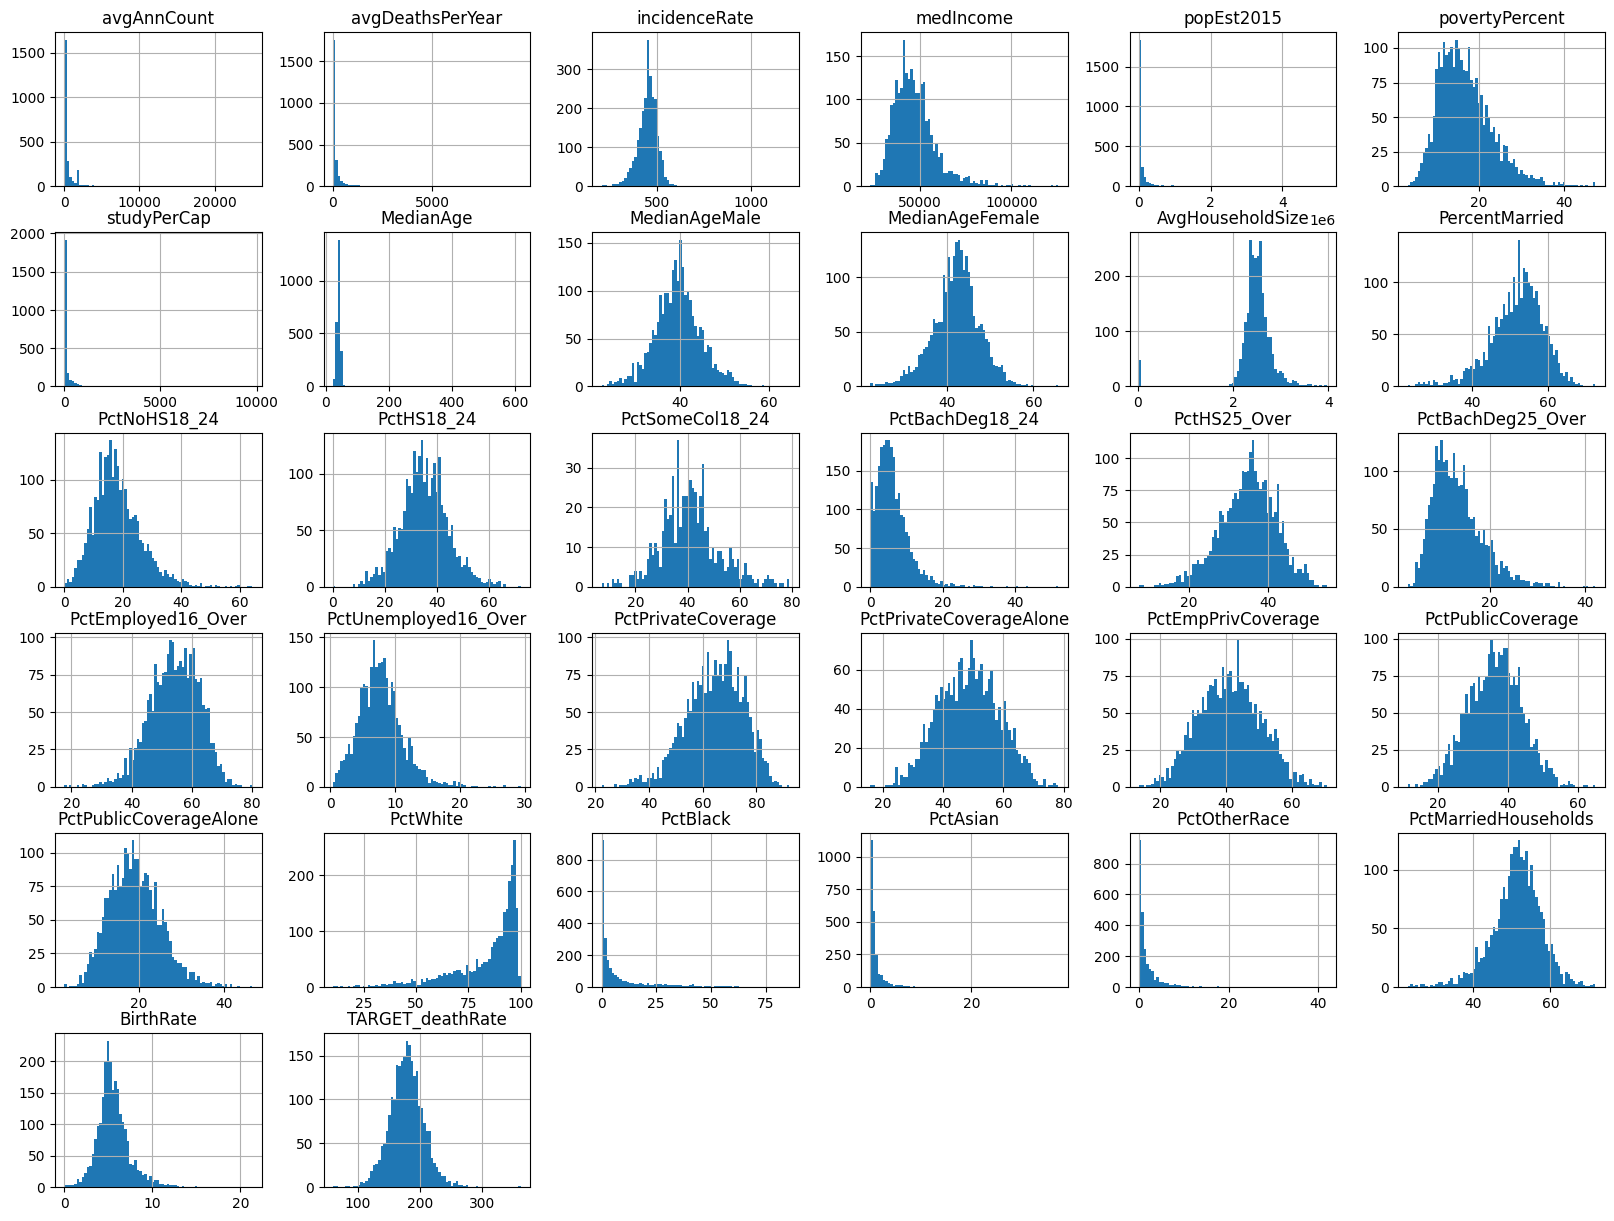

In [5]:
# Plot histograms of all features to visualise their distributions and identify outliers

%matplotlib inline
import matplotlib.pyplot as plt

train_targets.hist(bins=75, figsize=(20,15))

### Histogram Observations:
- median age has some extreme, unrealistic values: not the scale of the histogram, in at least one county the median age exceeds 500 years
- AvgHouseholdSize seems to have a few 0 or near 0 values - if realistic, implies most homes in a county are unoccupied
- Some counties have 0% asian, black and other races which is unlikely given the size of the counties
- counties birth rate is 0 in some counties which again seems unlikely
- avgAnnCount has an extremely large variance with some values as low as 6 and others above 20,000 and also a spike around 2500
- avgDeathsPerYear same as above

In [6]:
# Compute correlations of all features with the target variable (across the data set) 
# and sort them according the strength of correlations

corr = train_targets.corr().abs()
corr_TARGET = corr["TARGET_deathRate"].sort_values(ascending=False)
print(corr_TARGET)

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0

In [7]:
# Which are the top five features with strongest correlations to the targets?
top5 = corr_TARGET.drop("TARGET_deathRate").nlargest(n=5)
print(top5)

PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64


array([[<AxesSubplot: xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot: xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<AxesSubplot: xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='incidenceRate', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='medIncome', ylabel='incidenceRate'>,
        <AxesSubplot: xlabel='povertyPercent', ylabel='incidenceRate'>],
       [<AxesSubplot: xlabel='PctBachDeg25_Over', ylabel='PctPublicCoverageAlone'>,
        <AxesSubplot: xlabel='incidenceRate', ylabel='PctPublicCoverageAlone'>,
        <AxesSubplot: xlabel='PctPublicCoverageAlone', ylabel='PctPublicCoverageAlon

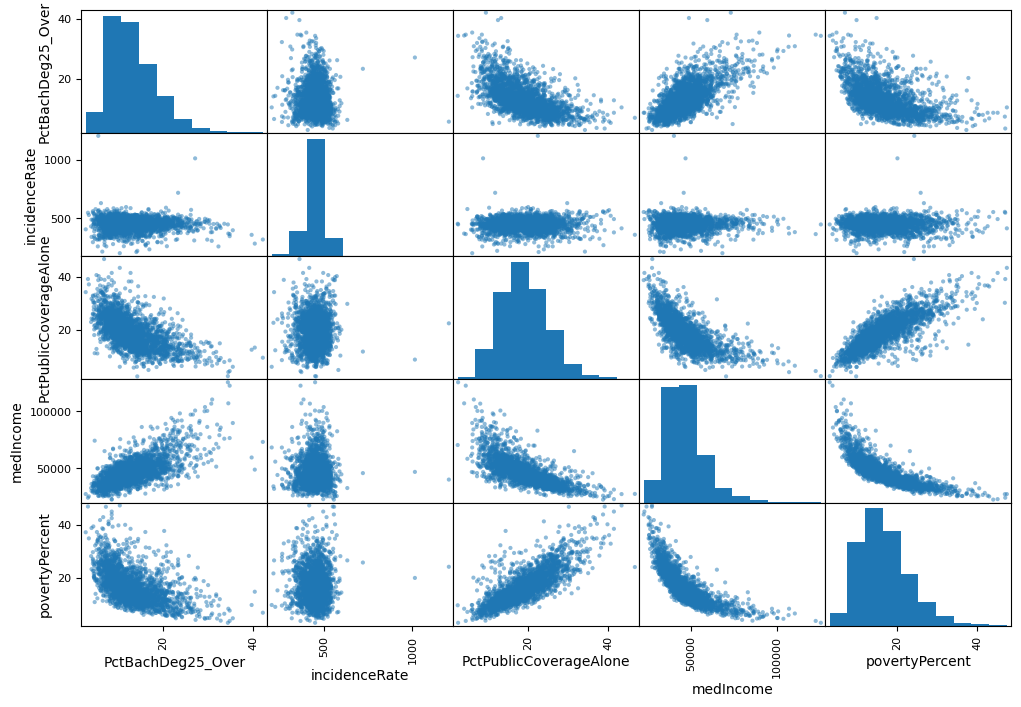

In [9]:
# Plot these correlations using the scatter matrix plotting function available in pandas and 
# comment on at least two sets of features that show visible correlations to each other

from pandas.plotting import scatter_matrix

attr = top5.index
scatter_matrix(train_targets[attr], figsize=(12,8))

### Correlation Observations:
- PctPublicCoverageAlone and povertyPercent have an obvious positive correlation which makes sense as the greater the poverty, typically the less access to private healthcare
- medIncome and PctPublicCoverageAlone also has an obvious negative correlation makes sense for the reasons stated above - the greater the wealth the more available private healthcare

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [6]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator

In [7]:
# Remove features with too much missing data
class FilterFeatures(BaseEstimator):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        
    def fit(self, X, y=None):
        missing_counts = X.isnull().sum()
        missing_percentages = missing_counts / X.shape[0]
        self.filtered_features = missing_percentages[missing_percentages >= self.threshold].index
        return self
    
    def transform(self, X):
        return X.drop(self.filtered_features, axis=1)

In [8]:
#Create new data class
class PerCapitaConverter(BaseEstimator):
    def __init__(self, deaths_column, count_column, population_column):
        self.avgDeathsPerYear = deaths_column
        self.avgAnnCount = count_column
        self.popEst2015 = population_column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        deaths = X[self.avgDeathsPerYear]
        count = X[self.avgAnnCount]
        population = X[self.popEst2015]
        deaths_per_capita = X[:, self.popEst2015]/ X[:, self.avgDeathsPerYear]
        count_per_capita = X[:, self.popEst2015]/ X[:, self.avgAnnCount]

        return np.c_[X, deaths_per_capita, count_per_capita]
        

In [12]:
# Create Pipeline
pipeline = Pipeline([
    ('filter_features', FilterFeatures(threshold=0.1)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [ ]:
# Split train_targets into features and targets
features = train_targets.drop("TARGET_deathRate",axis=1)
features_names = features.columns
targets = train_targets["TARGET_deathRate"].copy()

In [ ]:
# Apply pipeline to features
features_prepared = pipeline.fit_transform(features)

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split as tts

feature_train, feature_test, target_train, target_test = tts(features_prepared, targets, test_size=0.2, random_state=random_seed)

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [19]:
# Perform OLS Regression
lin_reg=linear_model.LinearRegression()
lin_reg.fit(feature_train, target_train)

lin_target_predict = lin_reg.predict(feature_test)

ols_comp = pd.DataFrame({
    'Actual' : target_test,
    'Predicted' : lin_target_predict
})

print("Predicted vs. Actual for Linear Regressor", "\n", ols_comp.sample(10,random_state=random_seed))

lin_mse=mean_squared_error(target_test, lin_target_predict)
lin_rmse=np.sqrt(lin_mse)

print("\nOLS Regressor RMSE:", lin_rmse)

NameError: name 'linear_model' is not defined

In [ ]:
print(type(target_test), target_test.shape)
print(type(lin_target_predict), lin_target_predict.shape)

In [18]:
# Finding best zone for regularisation weight for Lasso Regression using graph to visualise where it's best to look in more depth
lasso = linear_model.Lasso()

errors = []

alphas = np.logspace(-6, 6, 200)

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(feature_train, target_train)
    errors.append(np.sqrt(mean_squared_error(target_test, lasso.predict(feature_test))))
    
plt.figure(figsize=(20,6))
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("rms error")
plt.axis("tight")
plt.title("RMS Error as a function of regularisation: Lasso Regression")

plt.show()

NameError: name 'linear_model' is not defined

In [ ]:
# Finding best zone for regularisation weight for Ridge Regression using graph to visualise where it's best to look in more depth
ridge = linear_model.Ridge()

errors = []

alphas = np.logspace(-10, 10, 200)

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(feature_train, target_train)
    errors.append(np.sqrt(mean_squared_error(target_test, ridge.predict(feature_test))))
    
plt.figure(figsize=(20,6))
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("rms error")
plt.axis("tight")
plt.title("RMS Error as a function of regularisation: Ridge Regression")

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Perform Grid Search for Lasso Regresssion
# Look at graph above for estimate of range of alphas to check

# Use alphas between 1e-3 and 1e3
alphas = np.logspace(-3,3,51)

param_grid  = {'alpha': list(alphas)}

lgrid_search = GridSearchCV(lasso,param_grid,cv=5,scoring='neg_mean_squared_error')
lgrid_search.fit(features_prepared,targets)

lgrid_search.best_params_

In [ ]:
# Perform Grid Search for Ridge Regresssion
# Look at graph above for estimate of range of alphas to check

# USe alphas between 1e-1 and 1e6
alphas = np.logspace(-1,6,51)

param_grid  = {'alpha': list(alphas)}

rgrid_search = GridSearchCV(ridge,param_grid,cv=5,scoring='neg_mean_squared_error')
rgrid_search.fit(features_prepared,targets)

rgrid_search.best_params_

In [ ]:
# Using RandomisedSearchCV due to alphas being a continuous parameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

In [ ]:
# Perform Randomised Search for Lasso Regresssion
param_dist = {'alpha': loguniform(1e-3,1e3)}
n_iter_search = 30

lrand_search = RandomizedSearchCV(lasso,param_distributions=param_dist,n_iter=n_iter_search,random_state=random_seed)
lrand_search.fit(features_prepared,targets)

lrand_search.best_params_

In [ ]:
# Perform Randomised Search for Ridge Regresssion
param_dist = {'alpha': loguniform(1e-1,1e6)}
n_iter_search = 40

rrand_search = RandomizedSearchCV(ridge,param_distributions=param_dist,n_iter=n_iter_search,random_state=random_seed)
rrand_search.fit(features_prepared,targets)

rrand_search.best_params_

In [ ]:
# Used grid search and randomised search to find the values for alpha at which the models are most effective. 
# Cross-validated over 5 folds.

In [ ]:
# Lasso Regression with best regularisation weight @ alpha=0.05
lasso_reg = linear_model.Lasso(alpha=0.05)
lasso_reg.fit(feature_train, target_train)

lasso_target_predict = lasso_reg.predict(feature_test)

lasso_comp = pd.DataFrame({
    'Actual' : target_test,
    'Predicted' : lasso_target_predict
})

print("Predicted vs. Actual for Lasso Regressor", "\n", lasso_comp.sample(10,random_state=random_seed))

lasso_mse=mean_squared_error(target_test, lasso_target_predict)
lasso_rmse=np.sqrt(lasso_mse)

print("\nLASSO Regressor RMSE:", lasso_rmse)

In [ ]:
# Ridge Regression with best regularisation weight @ alpha=16
ridge_reg = linear_model.Ridge(alpha=16)
ridge_reg.fit(feature_train, target_train)

ridge_target_predict = ridge_reg.predict(feature_test)

ridge_comp = pd.DataFrame({
    'Actual' : target_test,
    'Predicted' : ridge_target_predict
})

print("Predicted vs. Actual for Ridge Regressor", "\n", ridge_comp.sample(10,random_state=random_seed))

ridge_mse=mean_squared_error(target_test, ridge_target_predict)
ridge_rmse=np.sqrt(ridge_mse)

print("\nRIDGE Regressor RMSE:", ridge_rmse)

In [ ]:
# Perform Cross-Validation
from sklearn.model_selection import cross_val_score

def display_scores(phrase="\nRegression Model:\n", rmse_scores=None, r2_scores=None):
    print(phrase)
    print('RMSE Scores:', rmse_scores)
    print('RMSE Scores Mean:', rmse_scores.mean())
    print('RMSE Scores Standard deviation:', rmse_scores.std())
    print('R2 Scores:', r2_scores)
    print('R2 Scores Mean:', r2_scores.mean())
    print('R2 Score Standard deviation', r2_scores.std())

ols_scores = cross_val_score(lin_reg, features_prepared, targets, scoring="neg_mean_squared_error", cv=10)
ols_rmse_scores = np.sqrt(-ols_scores)
ols_r2_scores = cross_val_score(lin_reg, features_prepared, targets, scoring="r2", cv=10)

lasso_scores = cross_val_score(lasso_reg, features_prepared, targets, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
lasso_r2_scores = cross_val_score(lasso_reg, features_prepared, targets, scoring="r2", cv=10)

ridge_scores = cross_val_score(ridge_reg, features_prepared, targets, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
ridge_r2_scores = cross_val_score(ridge_reg, features_prepared, targets, scoring="r2", cv=10)

display_scores("\nLinear Regression:\n", ols_rmse_scores, ols_r2_scores)
display_scores("\nLasso Regression:\n", lasso_rmse_scores, lasso_r2_scores)
display_scores("\nRidge Regression:\n", ridge_rmse_scores, ridge_r2_scores)

In [ ]:
"""
When cross validating the regression models with the desired regularisation weights, 
while Lasso regression has a lower mean rmse and lower standard deviation across all folds - indicating
that it was more consistently accurate - it didn't have the lowest R2 scores which can be found in the ols regression model
however it is worth noting that in all models, the R2 score is around 0.5 which is not very good 
(it suggests that the regression models only fit 50% of the data)

Looking at the models when applied to new data above having split the dataset, ols regression has the lowest RMS error
suggesting that it is the most effective model.
"""

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [ ]:
lasso_reg = linear_model.Lasso(alpha=0.05)
lasso_reg.fit(features_prepared, targets)
coefficients = lasso_reg.coef_
importance = np.abs(coefficients)

features_importance = zip(features_names, importance)
top_five_features = sorted(features_importance, key=lambda x: -x[1])[:5]
for feature, importance in top_five_features:
    print(f"Feature: {feature}, Relevance: {importance}")

In [ ]:
# incidenceRate
# PctBachDeg25_Over
# PctMarriedHouseholds
# PercentMarried
# PctPrivateCoverage

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

# TODO: HyperParam Configuration

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(feature_train, target_train)

In [ ]:
forest_target_predict = forest_reg.predict(feature_test)

In [ ]:
forest_mse = mean_squared_error(target_test, forest_target_predict)
forest_rsme=np.sqrt(forest_mse)
forest_rsme

In [ ]:
forest_scores=cross_val_score(forest_reg, features_prepared,targets,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-scores)
forest_r2_scores = cross_val_score(forest_reg, features_prepared, targets, scoring="r2", cv=10)

display_scores("\nRandomForest:\n", forest_rmse_scores, forest_r2_scores)

In [ ]:
# Random Forest shows greater R2 scores across the board and has a smaller RMS error value indicating a better model than
# all the linear regression models.

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(features_prepared, targets)
coefficients = forest_reg.feature_importances_
importance = np.abs(coefficients)

features_importance = zip(features_names, importance)
top_five_features = sorted(features_importance, key=lambda x: -x[1])[:5]
for feature, importance in top_five_features:
    print(f"Feature: {feature}, Relevance: {importance}")


In [ ]:
# PctBachDeg25_Over
# incidenceRate
# PctHS25_Over
# medIncome
# avgDeathsPerYear

In [ ]:
# Features identified as important are in a different order to the one identified with lasso regression, 
# there are also some new features identified as being important, and others lost

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [10]:
# Imports
import os
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

# set the random seed
random_seed = 42

In [13]:
## Define paths to the training data and targets files
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv'

## Read in the provided example test data
test_data_path = 'Test_data_example.csv'
test_targets_path ='Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

# Create RandomForestRegressor
forest_reg = RandomForestRegressor()

# Get training data (fresh!)
train = pd.read_csv(training_data_path)
targets = pd.read_csv(training_targets_path)
train_targets = train.join(targets)

# Put training features through the pipeline and extract training targets
train_prepared = pipeline.fit_transform(train)
targets_prepared = np.array(targets)
targets_prepared = targets_prepared.ravel()

# Train Regression model
forest_reg.fit(train_prepared, targets_prepared)

RandomForestRegressor()

In [14]:
# Prepare Test Data
test_data_prepared = pipeline.fit_transform(test_data)

test_targets_prepared = np.array(test_targets)
test_targets_prepared = test_targets_prepared.ravel()

In [15]:
# Predict on Test Data
prediction = forest_reg.predict(test_data_prepared)

In [16]:
# Comparing the actual output values with the predicted values
forest_compare = pd.DataFrame({
    'Actual' : test_targets_prepared, 
    'Predicted' : prediction
})

# Previewing 10 samples
print("Predicted .vs. Actual value samples for the Forest Regressor", "\n", forest_compare)

Predicted .vs. Actual value samples for the Forest Regressor 
     Actual  Predicted
0    181.2    177.701
1    173.4    180.749
2    148.4    153.301
3    213.5    204.620
4    155.2    155.098
5    220.2    214.439
6    156.6    180.011
7    148.6    182.982
8    172.8    184.777
9    164.9    199.598
10   123.6    143.590
11   216.3    229.234
12   136.9    137.591
13   242.9    192.910
14   179.4    182.007
15   146.4    162.464
16   209.9    190.939
17   159.8    209.497
18   170.0    179.417
19   195.4    179.313
20   184.3    187.218
21   158.7    148.933
22   188.2    198.277
23   155.8    161.720
24   191.2    192.275
25   198.7    195.230
26   179.0    189.753
27   186.5    175.884
28   222.4    162.106
29   174.2    164.961


In [17]:
# Get RMSE
print('Forest Regressor Root Mean Squared Error:', np.sqrt(mean_squared_error(test_targets_prepared, prediction)))

Forest Regressor Root Mean Squared Error: 21.595268281886813
